# Previsão de Vendas em Supermercado

# Machine Learning

# 1º Problema de Negócio

O Atacado Comercial Esperança analisou os dados de vendas dos últimos três anos para 1.559 produtos em 10 lojas localizadas em diferentes cidades.

Além disso, foram avaliadas diversas características dos produtos e das lojas para entender melhor o desempenho das vendas.

O objetivo é desenvolver um modelo de Machine Learning capaz de prever as vendas de cada produto em uma loja específica para o próximo ano.

Com essas previsões, o Atacado Comercial Esperança busca identificar padrões e tendências que permitam otimizar a gestão de estoque, impulsionar as vendas e aumentar o faturamento da empresa.

https://gist.github.com/regispires/acb4cb3112f611160fa0dc6c687feab7

* Contém o conjunto de dados relevante para o problema que foi mencionado sobre
prever vendas com Machine Learning.



https://www.analyticsvidhya.com/blog/2020/01/build-your-first-machine-learning-pipeline-using-scikit-learn/

* Criar uma pipeline desde a limpeza dos dados até a aplicação de modelos de aprendizado de máquina


<strong> 2° Onde os dados se encontram? </strong>

In [21]:
# Importação das Bibliotecas necessárias para o trabalho
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split

In [22]:
!pip install -U pandas-profiling

<strong> 3° Análise Exploratória dos Dados </strong>

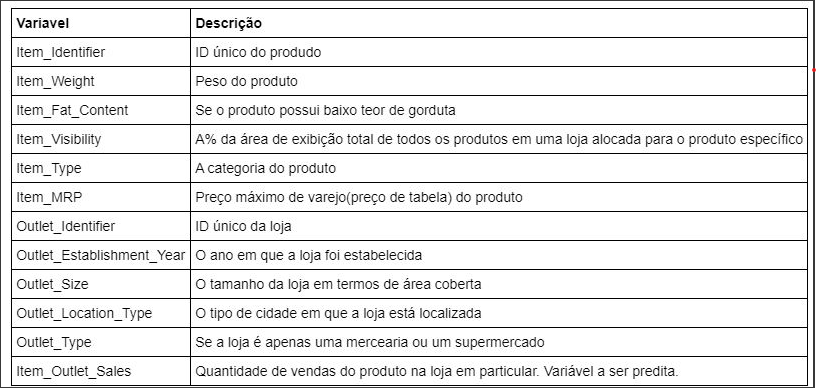

In [23]:
# Estrutura dos Dados
from PIL import Image
%matplotlib inline
im = Image.open("PV.png")
im.show()
im

In [24]:
# Importando os dados de treino e teste
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [25]:
# Visualizar os 10 primeiros registros
train_data.head(10)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,6.800000,0.037490,48.6034,2004,291.6204,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1,15.600000,0.172597,114.8518,1997,2163.1842,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
2,12.911575,0.054721,107.8254,1985,2387.5588,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,11.800000,0.098312,81.4618,1998,161.1236,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,17.850000,0.046600,125.1388,2004,1981.4208,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
5,13.150000,0.166033,170.8764,2009,2233.0932,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
6,20.600000,0.083474,120.8756,2007,1211.7560,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
7,20.200000,0.074178,93.2462,1987,1018.0082,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
8,12.911575,0.112250,123.3414,1985,243.6828,0,1,0,0,0,...,0,0,1,1,0,0,1,0,0,0
9,12.911575,0.138743,147.4760,1985,3368.9480,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [26]:
# shape dos dados
print('\nShape of training data :',train_data.shape)
print('\nShape of testing data :',test_data.shape)


Shape of training data : (1364, 36)

Shape of testing data : (341, 36)


###Conhecendo o Pandas Profiling

O Pandas Profiling é uma ferramenta Python que gera relatórios exploratórios automáticos a partir de um DataFrame do pandas. Ele fornece estatísticas descritivas, análise de correlação, gráficos interativos, e identifica dados faltantes e outliers. A ferramenta também analisa variáveis categóricas, facilitando a compreensão do conjunto de dados. Ideal para análise inicial e pré-processamento de dados.

In [27]:
from pandas_profiling import ProfileReport
profile = ProfileReport(train_data, title='Vendas do Supermercado Comercial Esperanca',html={'style':{'full_width':True}})
profile.to_notebook_iframe()
profile.to_file(output_file="Relatório- Base de Dados.html")

PydanticImportError: `BaseSettings` has been moved to the `pydantic-settings` package. See https://docs.pydantic.dev/2.11/migration/#basesettings-has-moved-to-pydantic-settings for more details.

For further information visit https://errors.pydantic.dev/2.11/u/import-error

In [28]:
# Pré-processamento dos dados - Amostra Treino e Teste

# Dados de Treino - Preparação para modelagem - Separação das  variáveis de entrada e variável de saida (target/label.....o que queremos prever...)
train_x = train_data.drop(columns=['Item_Outlet_Sales'],axis=1)
train_y = train_data['Item_Outlet_Sales']

# Dados de Teste - Preparação para modelagem - Separação das  variáveis de entrada e variável de saida (target/label.....o que queremos prever...)
test_x = test_data.drop(columns=['Item_Outlet_Sales'],axis=1)
test_y = test_data['Item_Outlet_Sales']

<strong> 4° Machine Learning  </strong>

In [29]:
# Modelagem

## Criação do Modelo - Linear Regression
model_L = LinearRegression()

# obs: Você pode adicionar parâmetros e testar para ver se melhora o resultado da sua predição
# Como por exemplo os parâmetros "fit_intercept" e "normalize"
# Documentação do sklearn LinearRegression:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

* O LinearRegression do scikit-learn é um modelo de regressão linear usado para prever um valor contínuo com base em uma ou mais variáveis independentes. Ele ajusta uma linha reta (ou hiperplano) aos dados. O parâmetro fit_intercept define se o modelo deve calcular o intercepto, enquanto normalize foi depreciado, e a normalização deve ser feita separadamente. O parâmetro copy_X determina se os dados de entrada devem ser copiados durante o treinamento. Ele é amplamente utilizado para problemas de previsão de valores contínuos.

In [30]:
# Treino do modelo - Dados de Treino
model_L.fit(train_x,train_y)

# Coeficientes do modelo Treinado
print('\nCoefficient of model :', model_L.coef_)

# intercepto do Modelo
print('\nIntercept of model',model_L.intercept_)


Coefficient of model : [-3.84197604e+00  9.83065945e+00  1.61711856e+01  6.09197622e+01
 -8.64161561e+01  1.23593376e+02  2.34714039e+02 -2.44597425e+02
 -2.72938329e+01 -8.09611456e+00 -3.01147840e+02  1.70727611e+02
 -5.40194744e+01  7.34248834e+01  1.70313375e+00 -5.07701615e+01
  1.63553657e+02 -5.85286125e+01  1.04913492e+02 -6.01944874e+01
  1.98948206e+02 -1.40959023e+02  1.19426257e+02  2.66382669e+01
 -1.85619792e+02  1.43925357e+03  2.16134663e+02  3.54723990e+01
  3.54832996e+02 -5.54559635e+00 -3.49287400e+02 -1.39202954e+03
 -2.57982359e+02 -9.59016062e+02  2.60902796e+03]

Intercept of model -121926.97473298338


In [34]:
# Fazendo Previsões com os dados de treino
predict_train = model_L.predict(train_x)
print('\nItem_Outlet_Sales on training data',predict_train)


Item_Outlet_Sales on training data [ 803.88817641 1733.98835979 3294.52154482 ...  811.16967914 2343.96927185
 2444.98869913]


In [35]:
# Calculando o RMSE Root Mean Squared Error - nos dados de treino
rmse_train = mean_squared_error(train_y,predict_train)**(0.5)
print('\nRMSE on train dataset : ', rmse_train)


RMSE on train dataset :  1135.8159344155245


In [36]:
# Fazendo Previsões com os dados de teste
predict_test = model_L.predict(test_x)
print('\nItem_Outlet_Sales on test data',predict_test)


Item_Outlet_Sales on test data [ 1615.37962439  3168.60806673  2564.31326686  2685.29698657
  2771.82059109  4223.3788671   2615.10827403   565.8088248
  4000.68496927  1035.54578573  2184.60316447  1033.54185437
   150.22804639  1616.19932803  2370.37858454  1953.693325
  2307.09514556  1429.85271583  2343.42149697  3780.28905363
   583.44339124  1089.08346168  2323.64661483  3559.90832258
  1829.46789667  1602.03985138   840.70282292  1823.14253132
  3145.30906529  1823.30397678  2103.35401623  3025.02597477
  2265.03907268   697.33936172  4474.05156681  2270.45195749
  1897.45212218  3305.0110824   2228.36615412  3767.90052861
  2162.33844917   665.40410258  -926.22966666   738.30407877
   197.90808777  2483.25075805  3693.05388376  2458.43116228
  1329.02544771   -57.67123156  1952.26612825  3614.4167807
  2127.22359714  2486.1932574   1826.90446272   786.7283994
  3200.67525412  1981.66000538  2326.98747373  3535.12951812
    53.4756877    129.4629475   4259.8975191   3732.152259

In [37]:
# Calculando o RMSE Root Mean Squared Error - nos dados de teste
rmse_test = mean_squared_error(test_y,predict_test)**(0.5)
print('\nRMSE on test dataset : ', rmse_test)


RMSE on test dataset :  1009.251723220972


In [38]:
# Criando o Modelo Mais Top Top - RandomForestRegressor
model_RFR = RandomForestRegressor(max_depth=5)

# Treinando o modelo - Dados de Treino
model_RFR.fit(train_x, train_y)

# Fazendo previsões com os dados de treino e teste
predict_train = model_RFR.predict(train_x)
predict_test = model_RFR.predict(test_x)

# Calculando o RMSE Root Mean Squared Error
print('RMSE on train data: ', mean_squared_error(train_y, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test)**(0.5))

RMSE on train data:  1024.9311072020496
RMSE on test data:  957.0967314773736


<strong> 5° Fazendo as Previsões </strong>

In [39]:
# Fazendo novas previsões predict the target on the testing dataset
predict_test = model_RFR.predict(test_x)
print('\nItem_Outlet_Sales on test data',predict_test)


Item_Outlet_Sales on test data [1429.14797114 2961.81680226 2700.54902911 2641.13689623 2618.62415346
 4009.83216388 2700.33732592 1423.88627599 4345.22079332  350.20123156
 1724.5593356   446.34849198  329.30029356 1555.86330938 2671.18227852
 1137.35297731 2597.96158754 1771.68828585 2240.82763601 4129.22394457
  735.12854556 1421.30523794 2626.7532372  2907.00583702 1699.24895513
 1419.00163988  758.38602381 2158.55021973 2838.94733324 1803.31485306
 1804.23390955 2874.39844571 2602.02972519  381.89880232 4066.69563468
 2255.84546336 1688.60457607 2915.75949243 2533.47451547 3643.84484088
 1139.01186078  755.45525277  144.97661789 1421.30523794  736.11075997
 2691.27127502 3567.28202967 2583.18157182 1300.33571546  221.59458999
 2382.70760176 3920.83308619 1615.30799584 2692.23578374 1569.20042173
  790.96011613 3070.73159299 1686.46824021 2198.33454326 2925.88742786
  305.5754398   255.34210262 4001.89581422 3896.0074654  4277.88360211
  780.06020732 1769.58380839  720.60750632  8

# Conclusão

O modelo de previsão de vendas criado para o Atacado Comercial Esperança usou Machine Learning para entender o comportamento das vendas nos últimos três anos. Foram testados diferentes algoritmos, e o Random Forest Regressor se destacou por entregar previsões mais precisas.

Os resultados mostram que o modelo conseguiu identificar padrões importantes, ajudando na gestão de estoque, planejamento de demanda e estratégias de vendas. A avaliação foi feita com a métrica RMSE, que mede o quão próximo o modelo chega dos valores reais. Como o RMSE ficou baixo nos testes, podemos dizer que o modelo tem uma boa capacidade de prever vendas futuras.

Com isso, a empresa pode tomar decisões mais inteligentes, como ajustar estoques para evitar desperdícios ou falta de produtos, identificar os itens com maior potencial de venda e melhorar a logística de distribuição. Para deixar o modelo ainda mais preciso, dá para testar ajustes mais avançados, como otimizar os parâmetros, testar modelos mais sofisticados e incluir fatores externos que influenciam as vendas.
